In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
df = pd.read_csv("../ift6758/data/preprocessed_data/preprocessed_game_data_copy.csv")
df['is_goal'] = df['type'] == 'goal'

In [33]:
df

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,timeRemaining,...,shooting_player_id,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal
0,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,54,1,00:38,19:22,...,8477504,Josh Morrissey,8475883.0,Frederik Andersen,-36.0,-28.0,52,wrist,O,False
1,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,55,1,00:49,19:11,...,8473574,Shawn Matthias,8475883.0,Frederik Andersen,-75.0,1.0,52,wrist,O,False
2,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,58,1,01:03,18:57,...,8473412,Bryan Little,8475883.0,Frederik Andersen,-73.0,10.0,52,backhand,O,False
3,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,62,1,01:46,18:14,...,8470611,Eric Fehr,8473461.0,Steve Mason,80.0,-3.0,10,wrist,O,False
4,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,68,1,03:42,16:18,...,8479339,Patrik Laine,8475883.0,Frederik Andersen,-44.0,-21.0,52,snap,O,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
529388,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,935,3,09:00,11:00,...,8476479,Phillip Danault,8482821.0,Arvid Soderblom,-73.0,-27.0,26,wrist,O,False
529389,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,971,3,12:41,07:19,...,8482124,Quinton Byfield,8482821.0,Arvid Soderblom,-74.0,-21.0,26,wrist,O,False
529390,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,1024,3,17:28,02:32,...,8478882,Vladislav Gavrikov,8482821.0,Arvid Soderblom,-27.0,-27.0,26,slap,O,False
529391,2023021312,20232024,2024-04-18,Los Angeles,Kings,Blackhawks,1039,3,18:39,01:21,...,8478042,Viktor Arvidsson,8482821.0,Arvid Soderblom,-74.0,8.0,26,wrist,O,True


# Figure 3.1: most dangerous kind of shots ? most common type of shots ?
The most dangerous kind of shot seems to be the deflection (18% of chance of scoring). This makes sense because it's very hard for goalie to catch an imprevisible shot like this one.
It's also worth noting that the "tip-in" shot is very dangerous (16% chance of scoring), but it's also very difficult to make that shot. 
All the other shot types have less than 10% change of being goals, but are more frequent.

The wrist shot is the most common, and not the most dangerous one. However, it's the shot that produces the highest number of goals overall.

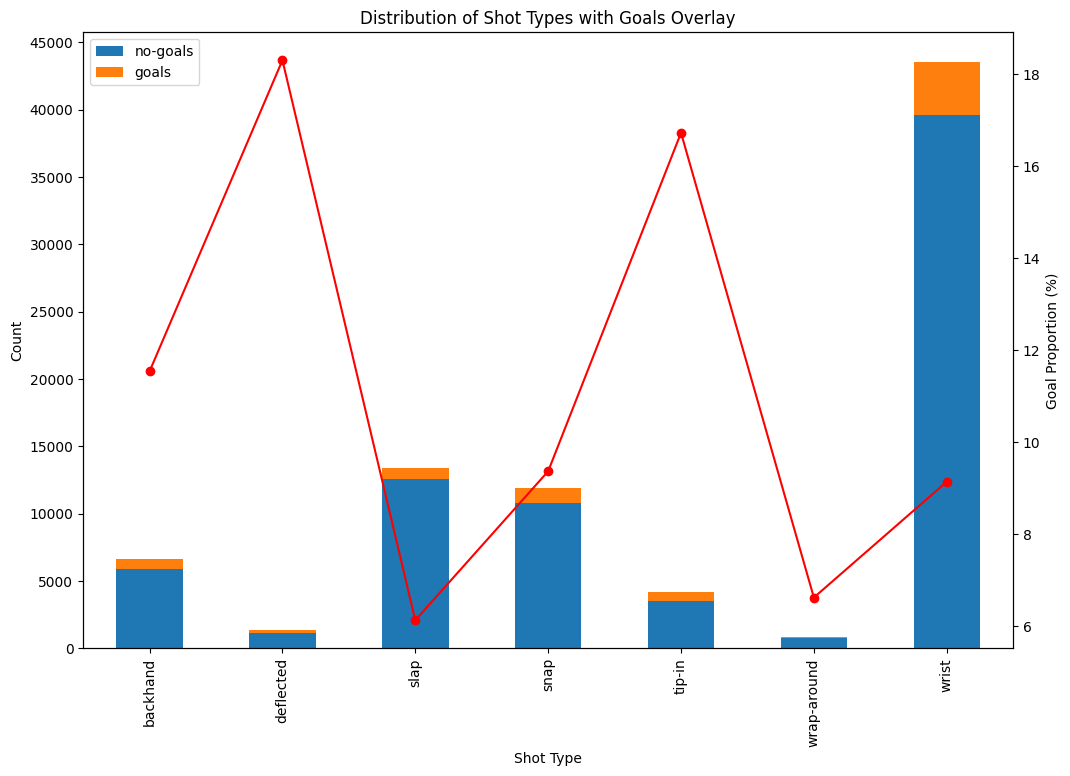

In [6]:
df_2017 = df[df['season'] == 20172018]

# Calculate the number of goals for each shot type
goal_counts = df_2017[df_2017['type'] == 'goal']['shot_type'].value_counts()
no_goal_counts = df_2017[df_2017['type'] == 'shot-on-goal']['shot_type'].value_counts()


# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / (shot_type_distribution['no-goals'] + shot_type_distribution['goals'])


# Plot the distribution of no-goals and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals
shot_type_distribution[['no-goals', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Shot Types with Goals Overlay')
ax1.set_xlabel('Shot Type')
ax1.set_ylabel('Count')
y_ticks_labels = range(0, max(shot_type_distribution['no-goals'] + shot_type_distribution['goals']) + 5000, 5000)
ax1.set_yticks(y_ticks_labels)

# Create a secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')

plt.show()

# Figure 3.2
- for 2017 season, high chance of scoring from high distance: less shots are attempted, and the few that score are because of the abscence of the goalie in front of net

## distance calculation and sanity checks

In [35]:
# Calculate the distance from the goal (assuming the goal is at (-100, 0) or (100, 0))
left_goal_coords = (-100+11, 0)
right_goal_coords = (100-11, 0)

def min_distance(row):
    left_goal_distance = ((row['x_coord'] - left_goal_coords[0])**2 + row['y_coord']**2)**0.5
    right_goal_distance = ((row['x_coord'] - right_goal_coords[0])**2 + row['y_coord']**2)**0.5
    return min(left_goal_distance, right_goal_distance)

df['distance'] = df.apply(min_distance, axis=1)

In [8]:
df

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
0,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,54,1,00:38,shot-on-goal,...,Josh Morrissey,8475883.0,Frederik Andersen,-36.0,-28.0,52,wrist,O,False,59.941638
1,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,55,1,00:49,shot-on-goal,...,Shawn Matthias,8475883.0,Frederik Andersen,-75.0,1.0,52,wrist,O,False,14.035669
2,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,58,1,01:03,shot-on-goal,...,Bryan Little,8475883.0,Frederik Andersen,-73.0,10.0,52,backhand,O,False,18.867962
3,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,62,1,01:46,shot-on-goal,...,Eric Fehr,8473461.0,Steve Mason,80.0,-3.0,10,wrist,O,False,9.486833
4,2017020001,20172018,2017-10-04,Winnipeg,Jets,Maple Leafs,68,1,03:42,shot-on-goal,...,Patrik Laine,8475883.0,Frederik Andersen,-44.0,-21.0,52,snap,O,False,49.658836
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81868,2017021271,20172018,2018-04-07,San Jose,Sharks,Wild,634,3,18:10,shot-on-goal,...,Timo Meier,8471227.0,Devan Dubnyk,-52.0,-35.0,28,snap,O,False,50.931326
81869,2017021271,20172018,2018-04-07,San Jose,Sharks,Wild,638,3,18:50,goal,...,Timo Meier,8471227.0,Devan Dubnyk,-29.0,10.0,28,deflected,O,True,60.827625
81870,2017021271,20172018,2018-04-07,San Jose,Sharks,Wild,641,3,19:22,shot-on-goal,...,Brent Burns,8471227.0,Devan Dubnyk,-31.0,16.0,28,wrist,O,False,60.166436
81871,2017021271,20172018,2018-04-07,San Jose,Sharks,Wild,642,3,19:25,shot-on-goal,...,Joe Pavelski,8471227.0,Devan Dubnyk,-80.0,8.0,28,wrist,O,False,12.041595


In [9]:
df[df["distance"] < 1]


,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
20641,2017020321,20172018,2017-11-22,Sunrise,Panthers,Maple Leafs,960,5,00:00,goal,...,Nick Bjugstad,8475883.0,Frederik Andersen,-89.0,0.0,13,snap,D,True,0.0


In [10]:
df[df["distance"]>90]

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
510,2017020008,20172018,2017-10-05,Ottawa,Senators,Capitals,298,2,09:00,shot-on-goal,...,Brooks Orpik,8467950.0,Craig Anderson,-6.0,35.0,15,slap,N,False,90.077744
2611,2017020039,20172018,2017-10-10,New York,Rangers,Blues,504,3,01:14,shot-on-goal,...,Alex Pietrangelo,8468685.0,Henrik Lundqvist,3.0,-39.0,19,wrist,N,False,94.429868
2934,2017020044,20172018,2017-10-10,Vancouver,Canucks,Senators,617,3,03:03,shot-on-goal,...,Mark Borowiecki,8474593.0,Jacob Markstrom,-4.0,-33.0,9,wrist,N,False,91.181138
3328,2017020050,20172018,2017-10-11,Los Angeles,Kings,Flames,330,2,06:35,shot-on-goal,...,Tanner Glass,8471734.0,Jonathan Quick,4.0,38.0,20,snap,N,False,93.107465
3589,2017020053,20172018,2017-10-12,Nashville,Predators,Stars,598,3,18:28,shot-on-goal,...,Marc Methot,8471469.0,Pekka Rinne,0.0,-29.0,25,wrist,N,False,93.605555
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81200,2017021261,20172018,2018-04-07,Sunrise,Panthers,Sabres,238,2,04:53,shot-on-goal,...,Nathan Beaulieu,8473503.0,James Reimer,0.0,21.0,7,slap,N,False,91.443972
81268,2017021262,20172018,2018-04-07,Washington,Capitals,Devils,239,2,10:43,shot-on-goal,...,Andy Greene,8474651.0,Braden Holtby,-4.0,39.0,1,wrist,N,False,93.520051
81307,2017021263,20172018,2018-04-07,Raleigh,Hurricanes,Lightning,33,1,09:15,shot-on-goal,...,Anthony Cirelli,8470320.0,Cam Ward,1.0,-34.0,14,backhand,N,False,94.339811
81313,2017021263,20172018,2018-04-07,Raleigh,Hurricanes,Lightning,50,1,16:54,shot-on-goal,...,Justin Williams,8475839.0,Louis Domingue,5.0,39.0,12,wrist,N,False,92.612094


In [11]:
df[df["distance"]>95].is_goal.value_counts()

is_goal
False    36
True      3
Name: count, dtype: int64

In [12]:
# all of the long distance goals are scored without a goalie defending the net
df_2017 = df[df['season'] == 20172018]
df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100) & (df["goalie_id"].isna())].is_goal.value_counts()

is_goal
True    3
Name: count, dtype: int64

In [13]:
df_2017[(df_2017["distance"] > 95) & (df_2017["distance"] < 100)]

,game id,season,date,venue_location,home_team,away_team,event_id,period,timeInPeriod,type,...,shooting_player_name,goalie_id,goalie_name,x_coord,y_coord,owner_team,shot_type,zone_code,is_goal,distance
4976,2017020077,20172018,2017-10-15,Paradise,Golden Knights,Bruins,85,1,16:30,shot-on-goal,...,David Krejci,8476876.0,Malcolm Subban,1.0,-36.0,6,wrist,N,False,95.078915
6366,2017020099,20172018,2017-10-19,Ottawa,Senators,Devils,66,1,02:06,shot-on-goal,...,Stefan Noesen,8467950.0,Craig Anderson,-1.0,39.0,1,tip-in,N,False,96.254870
6443,2017020100,20172018,2017-10-19,Chicago,Blackhawks,Oilers,9,1,00:23,shot-on-goal,...,Adam Larsson,8476341.0,Anton Forsberg,-1.0,-36.0,22,wrist,N,False,95.078915
7591,2017020117,20172018,2017-10-21,Columbus,Blue Jackets,Kings,491,3,02:03,shot-on-goal,...,Markus Nutivaara,8471734.0,Jonathan Quick,1.0,-38.0,29,backhand,N,False,95.854056
7901,2017020122,20172018,2017-10-22,Detroit,Red Wings,Canucks,215,2,03:25,shot-on-goal,...,Nick Jensen,8474593.0,Jacob Markstrom,1.0,-38.0,17,wrist,N,False,95.854056
12632,2017020196,20172018,2017-11-02,Glendale,Coyotes,Sabres,338,2,09:05,shot-on-goal,...,Rasmus Ristolainen,8477293.0,Antti Raanta,1.0,-37.0,7,wrist,N,False,95.462034
14155,2017020219,20172018,2017-11-06,New York,Rangers,Blue Jackets,341,2,13:55,shot-on-goal,...,Zac Dalpe,8468685.0,Henrik Lundqvist,1.0,-38.0,29,backhand,N,False,95.854056
16891,2017020262,20172018,2017-11-12,Chicago,Blackhawks,Devils,691,3,19:13,shot-on-goal,...,Drew Stafford,8476341.0,Anton Forsberg,2.0,-39.0,1,wrist,N,False,95.341491
18191,2017020283,20172018,2017-11-16,St. Paul,Wild,Predators,589,3,04:07,shot-on-goal,...,Ryan Suter,8471469.0,Pekka Rinne,-2.0,-39.0,30,slap,N,False,95.341491
22098,2017020344,20172018,2017-11-24,St. Louis,Blues,Predators,284,2,08:44,shot-on-goal,...,Chris Thorburn,8471469.0,Pekka Rinne,1.0,-39.0,19,wrist,N,False,96.254870


## plotting

C:\Users\dre\AppData\Local\Temp\ipykernel_29060\364079169.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts = df_2017[df_2017['type'] == 'goal'].groupby(distance_bins).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_29060\364079169.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts = df_2017[df_2017['type'] == 'shot-on-goal'].groupby(distance_bins).size()


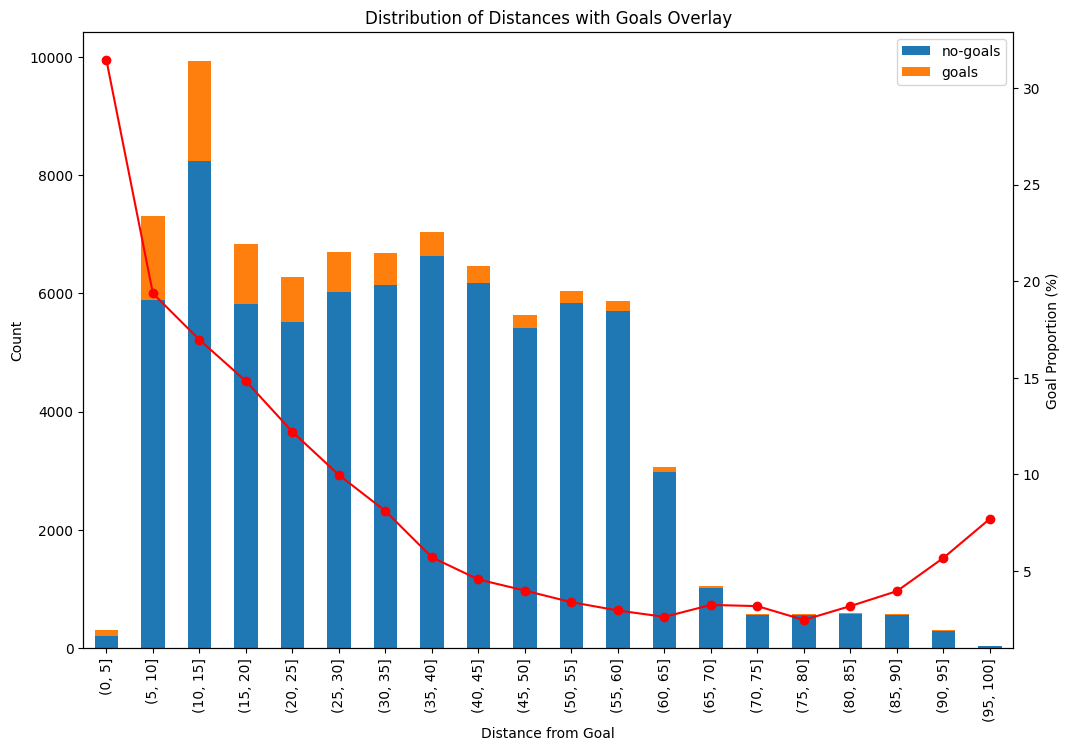

In [36]:

# Create bins for distance
df_2017 = df[df['season'] == 20172018]
bins = list(range(0, int(max(df["distance"])) + 5, 5))
distance_bins = pd.cut(df_2017['distance'], bins=bins)

# Calculate the number of goals for each distance bin
goal_counts = df_2017[df_2017['type'] == 'goal'].groupby(distance_bins).size()
no_goal_counts = df_2017[df_2017['type'] == 'shot-on-goal'].groupby(distance_bins).size()

# Overlay the number of goals over the number of shots
shot_type_distribution = pd.DataFrame({
    'no-goals': no_goal_counts,
    'goals': goal_counts
}).fillna(0)

# Calculate the proportion of goals per shot type
shot_type_distribution['goal_proportion'] = shot_type_distribution['goals'] / ( shot_type_distribution['no-goals'] + shot_type_distribution['goals'])

# Plot the distribution of no-goals and goals
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals
shot_type_distribution[['no-goals', 'goals']].plot(kind='bar', stacked=True, ax=ax1)
ax1.set_title('Distribution of Distances with Goals Overlay')
ax1.set_xlabel('Distance from Goal')
ax1.set_ylabel('Count')

# Secondary y-axis for the goal proportion
ax2 = ax1.twinx()
shot_type_distribution['goal_proportion'] *= 100 
shot_type_distribution['goal_proportion'].plot(kind='line', color='red', marker='o', ax=ax2)
ax2.set_ylabel('Goal Proportion (%)')


plt.show()

C:\Users\dre\AppData\Local\Temp\ipykernel_29060\1992569464.py:17: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_counts_2017_2018 = df_2017_2018[df_2017_2018['type'] == 'goal'].groupby(distance_bins_2017_2018).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_29060\1992569464.py:18: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  no_goal_counts_2017_2018 = df_2017_2018[df_2017_2018['type'] == 'shot-on-goal'].groupby(distance_bins_2017_2018).size()
C:\Users\dre\AppData\Local\Temp\ipykernel_29060\1992569464.py:20: FutureWarning: The default of observed=False is deprecated and will be changed to True in a futur

           no-goals  goals  total_shots  goal_proportion     season
distance                                                           
(0, 10]        6098   1510         7608         0.198475  2017-2018
(10, 20]      14063   2697        16760         0.160919  2017-2018
(20, 30]      11543   1433        12976         0.110435  2017-2018
(30, 40]      12782    942        13724         0.068639  2017-2018
(40, 50]      11579    518        12097         0.042821  2017-2018
(50, 60]      11548    377        11925         0.031614  2017-2018
(60, 70]       4000    114         4114         0.027710  2017-2018
(70, 80]       1107     32         1139         0.028095  2017-2018
(80, 90]       1140     42         1182         0.035533  2017-2018
(90, 100]       319     20          339         0.058997  2017-2018
(0, 10]        6375   1518         7893         0.192322  2018-2019
(10, 20]      13856   2679        16535         0.162020  2018-2019
(20, 30]      11170   1517        12687         

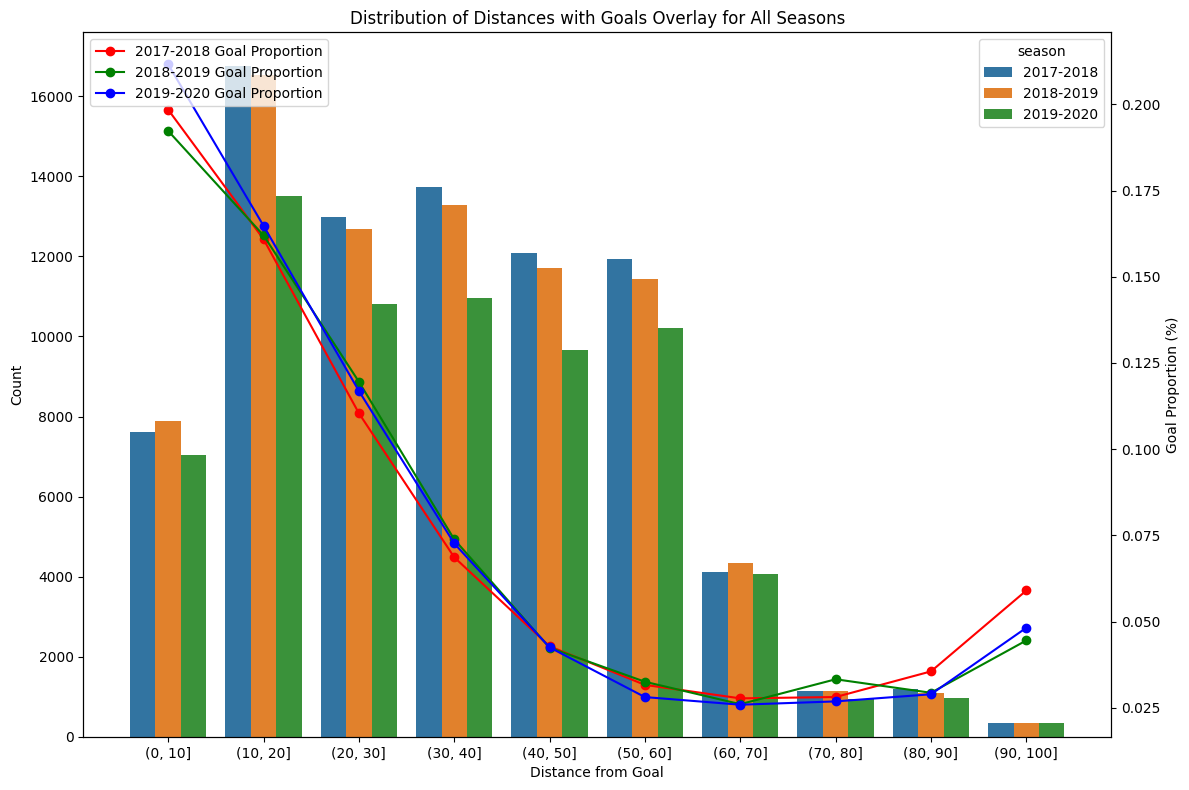

In [45]:
# Create bins for distance
df_2017_2018 = df[df['season'] == 20172018]
df_2018_2019 = df[df['season'] == 20182019]
df_2019_2020 = df[df['season'] == 20192020]

bins = list(range(0, int(max(df["distance"])) + 10, 10))
distance_bins_2017_2018 = pd.cut(df_2017_2018['distance'], bins=bins)
distance_bins_2018_2019 = pd.cut(df_2018_2019['distance'], bins=bins)
distance_bins_2019_2020 = pd.cut(df_2019_2020['distance'], bins=bins)

# Combine the data for all three seasons
df_combined = pd.concat([df_2017_2018, df_2018_2019, df_2019_2020])

# Calculate the number of goals for each distance bin for each season
goal_counts_2017_2018 = df_2017_2018[df_2017_2018['type'] == 'goal'].groupby(distance_bins_2017_2018).size()
no_goal_counts_2017_2018 = df_2017_2018[df_2017_2018['type'] == 'shot-on-goal'].groupby(distance_bins_2017_2018).size()

goal_counts_2018_2019 = df_2018_2019[df_2018_2019['type'] == 'goal'].groupby(distance_bins_2018_2019).size()
no_goal_counts_2018_2019 = df_2018_2019[df_2018_2019['type'] == 'shot-on-goal'].groupby(distance_bins_2018_2019).size()

goal_counts_2019_2020 = df_2019_2020[df_2019_2020['type'] == 'goal'].groupby(distance_bins_2019_2020).size()
no_goal_counts_2019_2020 = df_2019_2020[df_2019_2020['type'] == 'shot-on-goal'].groupby(distance_bins_2019_2020).size()

# Overlay the number of goals over the number of shots for each season
shot_type_distribution_2017_2018 = pd.DataFrame({
    'no-goals': no_goal_counts_2017_2018,
    'goals': goal_counts_2017_2018,
    'total_shots': no_goal_counts_2017_2018 + goal_counts_2017_2018
}).fillna(0)

shot_type_distribution_2018_2019 = pd.DataFrame({
    'no-goals': no_goal_counts_2018_2019,
    'goals': goal_counts_2018_2019,
    'total_shots': no_goal_counts_2018_2019 + goal_counts_2018_2019
}).fillna(0)

shot_type_distribution_2019_2020 = pd.DataFrame({
    'no-goals': no_goal_counts_2019_2020,
    'goals': goal_counts_2019_2020,
    'total_shots': no_goal_counts_2019_2020 + goal_counts_2019_2020
}).fillna(0)

# Calculate the proportion of goals per shot type for each season
shot_type_distribution_2017_2018['goal_proportion'] = shot_type_distribution_2017_2018['goals'] / (shot_type_distribution_2017_2018['no-goals'] + shot_type_distribution_2017_2018['goals'])
shot_type_distribution_2018_2019['goal_proportion'] = shot_type_distribution_2018_2019['goals'] / (shot_type_distribution_2018_2019['no-goals'] + shot_type_distribution_2018_2019['goals'])
shot_type_distribution_2019_2020['goal_proportion'] = shot_type_distribution_2019_2020['goals'] / (shot_type_distribution_2019_2020['no-goals'] + shot_type_distribution_2019_2020['goals'])


# Combine the data for all three seasons into one DataFrame for plotting
combined_shot_type_distribution = pd.concat([
    shot_type_distribution_2017_2018.assign(season='2017-2018'),
    shot_type_distribution_2018_2019.assign(season='2018-2019'),
    shot_type_distribution_2019_2020.assign(season='2019-2020')
])
print(combined_shot_type_distribution)

# Plot the distribution of no-goals and goals for each season on the same plot
fig, ax1 = plt.subplots(figsize=(12, 8))

# Plot the bar chart for no-goals and goals for each season
sns.barplot(data=combined_shot_type_distribution.reset_index(), x='distance', y='total_shots', hue='season', ax=ax1, dodge=True)


ax1.set_title('Distribution of Distances with Goals Overlay for All Seasons')
ax1.set_xlabel('Distance from Goal')
ax1.set_ylabel('Count')

# Create a secondary y-axis for the goal proportion for each season
ax2 = ax1.twinx()
for season, color in zip(['2017-2018', '2018-2019', '2019-2020'], ['red', 'green', 'blue']):
    season_data = combined_shot_type_distribution[combined_shot_type_distribution['season'] == season]
    season_data['goal_proportion'].plot(kind='line', color=color, marker='o', ax=ax2, label=f'{season} Goal Proportion')

ax2.set_ylabel('Goal Proportion (%)')
ax2.legend(loc='upper left')

plt.tight_layout()
plt.show()

In [15]:
plot_distances

<function __main__.plot_distances(season)>

# figure 3.3
distance bining is the same as last figure -> interval of 5 feet ok ?


C:\Users\dre\AppData\Local\Temp\ipykernel_29060\2893569341.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  goal_percentage = df_2017.groupby([distance_bins, 'shot_type'])['is_goal'].mean().reset_index()


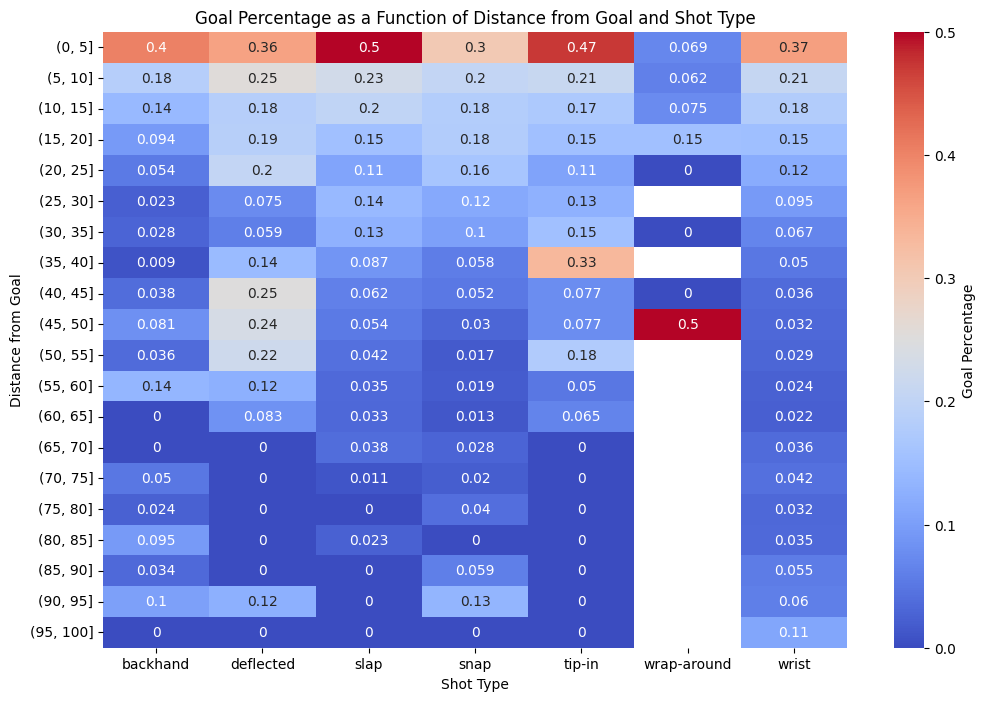

In [16]:
# Calculate goal percentage for each combination of distance bin and shot type
goal_percentage = df_2017.groupby([distance_bins, 'shot_type'])['is_goal'].mean().reset_index()

# Pivot the data for easier plotting
goal_percentage_pivot = goal_percentage.pivot(index='distance', columns='shot_type', values='is_goal')

# Plot the data
plt.figure(figsize=(12, 8))
sns.heatmap(goal_percentage_pivot, annot=True, cmap='coolwarm', cbar_kws={'label': 'Goal Percentage'})
plt.title('Goal Percentage as a Function of Distance from Goal and Shot Type')
plt.xlabel('Shot Type')
plt.ylabel('Distance from Goal')
plt.show()